<a href="https://colab.research.google.com/github/Ademola-Olorunnisola/TB-Estimator/blob/main/Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Parameter values


In [198]:
N = 500000  #Total population


mu     = 8 / 1000 / 365  # Natural death rate per day
Lambda = mu * N  # Births Per day
delta  =  1 / 1000 / 365    # TB death rate per day

#Control Inputs

In [199]:
alpha = 1 / 365   #Vaccination rate ~ 1% of S per day
tau   = 1 / 90    # treatment rate per day

#Model Parameters


In [200]:
beta =  0.070   # Transmission rate (every Infectious person infects 2 others on average)
sigma =  0.50   # Vaccination Inefficiency (50% effective)
gamma = 1 / 180 # Treatment completion (6 months treatment)
eps = 1 / 365   # Latency progression rate
phi = 0.03      # Exogenous reinfection rate (i.e R faces 43% infection risk)
rho = 0.21 * (1 / 180) # treatment failure (21% Failure)

#TB MODEL / ODE SYSTEM

In [201]:
def sveirt(t, x):
    S, V, E, I, T, R = x
    lam = beta * I / N
    dS = Lambda - lam*S     - alpha*S - mu*S
    dV = alpha*S - sigma*lam*V        - mu*V
    dE = lam*S + sigma*lam*V + (phi*R*I) / N - (eps + mu)*E
    dI = eps*E + rho*T      - (tau + mu + delta)*I
    dT = tau*I              - (gamma + rho + mu)*T
    dR = gamma*T            - mu*R - (phi*R*I) / N
    return [dS, dV, dE, dI, dT, dR]

#Initial conditions

In [202]:
I0  = 0.0015 * N
V0  = 0.10 * N
E0  = 0.005 * N
T0  = 0.0009 * N
R0  = 0.0933 * N
S0  = N - V0 - E0 - I0 - T0 - R0

In [203]:
(S0 + V0 + E0 + I0 + T0 + R0)

500000.0

#SOlve ODE

In [204]:
t = 365
t_eval = np.linspace(0, t, 1000)

In [205]:
x0     = [S0, V0, E0, I0, T0, R0]

In [206]:
sol = solve_ivp(
    sveirt,
    (0, t),
    x0,
    t_eval=t_eval,
    method='RK45',
    rtol=1e-8,
    atol=1e-10)

t            = sol.t
S, V, E, I, T, R = sol.y

#plot

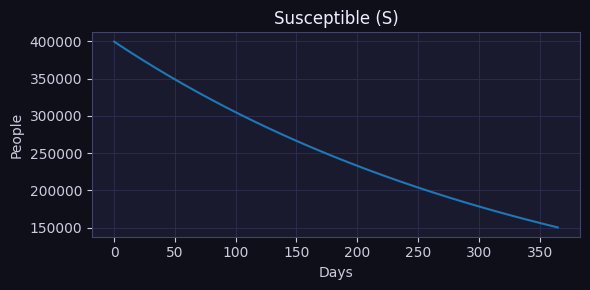

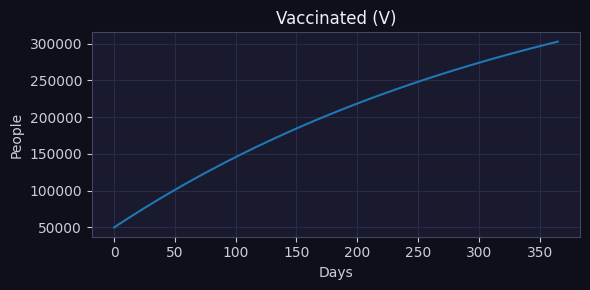

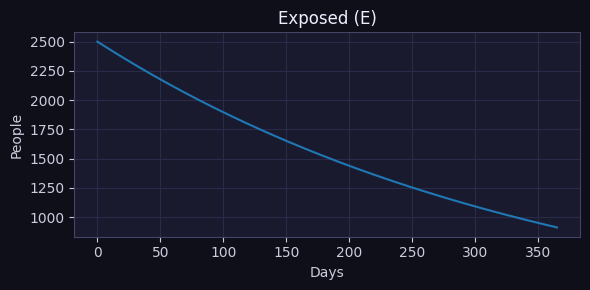

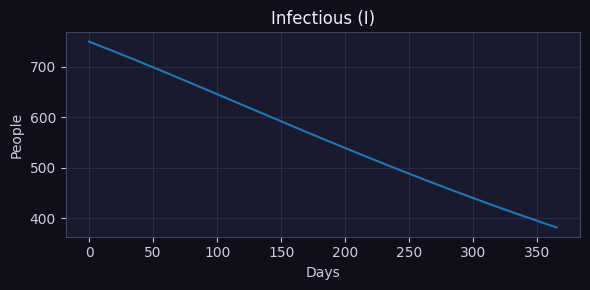

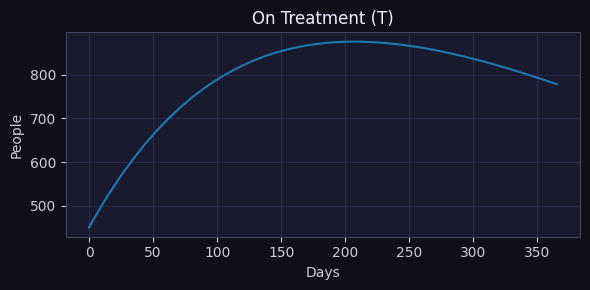

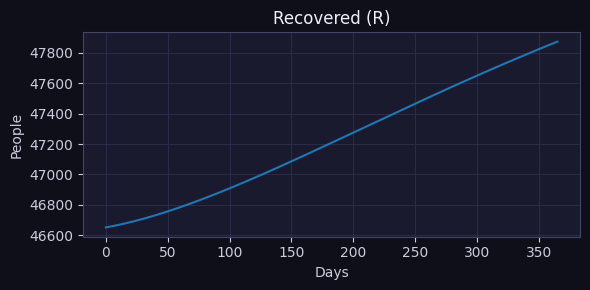

In [216]:
for y, title, _ in compartment_plots:
    plt.figure(figsize=(6, 3))
    plt.plot(t, y * N)
    plt.title(title)
    plt.xlabel("Days")
    plt.ylabel("People")
    plt.grid(True)
    plt.tight_layout()
    plt.show()